# Yahoo Finance

### Description:

### Resources:
- https://algotrading101.com/learn/yahoo-finance-api-guide/

### Preparations:

In [30]:
# ------------------------- IMPORTS --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# ------------------------- DATASET ---------------------------
ds = pd.read_csv('stocks.csv')
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'Ticker']
ds.columns = columns
print('FIELDS :     ' + str(columns))
print('TICKERS :      ' + str(ds['Ticker'].unique()))

FIELDS :     ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'Ticker']
TICKERS :      ['AMZN' 'AAPL' 'TSLA' 'SNAP' 'SBUX' 'META' 'TWTR' 'NFLX' 'MSFT' 'GME'
 'AMC' 'DIS' 'BAC' 'F' 'SPOT' 'V']


In [58]:
# ------------------------- ASSIST FUNCTIONS --------------------------
def numeric_date(date):
    d = str(date)
    return int(d[0:4] + d[5:7] + d[8:10])

def getyear_date(date):
    d = str(date)
    return int(d[0:4])

def best_time_formatting(date):
    dt.datetime.strptime(date, "%Y-%m-%d").date()

def plot_xdate(x, y):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.plot(x, y)
    plt.gcf().autofmt_xdate()
    # plt.show()

# ------------------------- DATASET REFORMATTING --------------------------
# ds['Date'] = list(map(lambda x: best_time_formatting(x) ,ds['Date']))
ds['Margin'] = ds['High'] - ds['Low'] #difference between higghest and lowest
ds['Difference'] = abs(ds['Open'] - ds['Close']) #difference between start and close values
ds['Value@Close'] = ds['Volume'] * ds['Close'] #difference between start and close values

### Analysis:

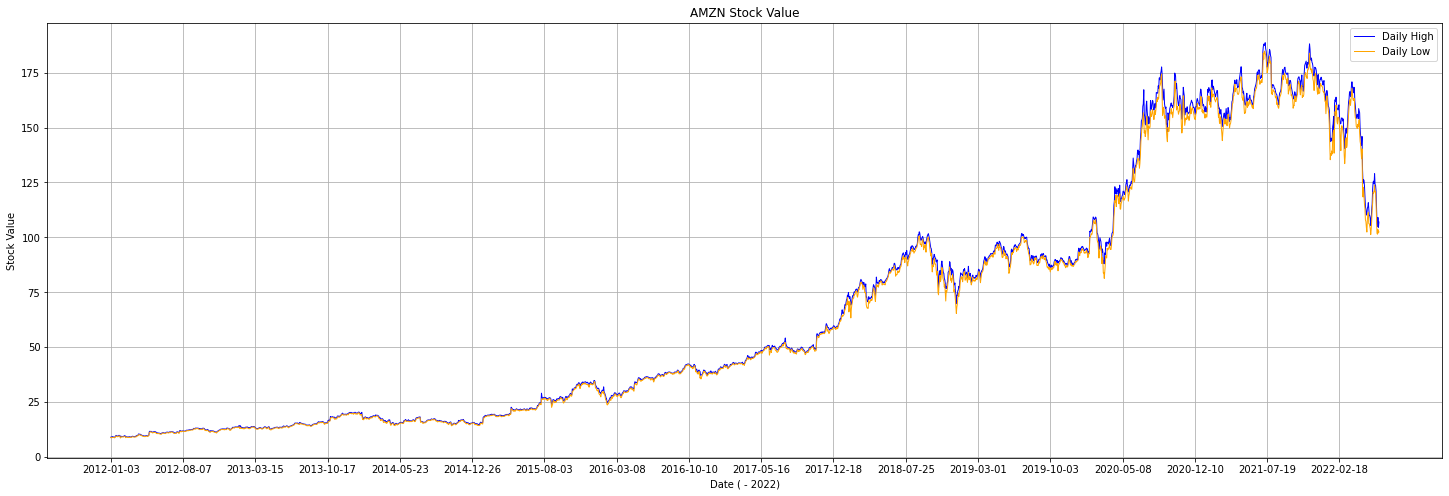

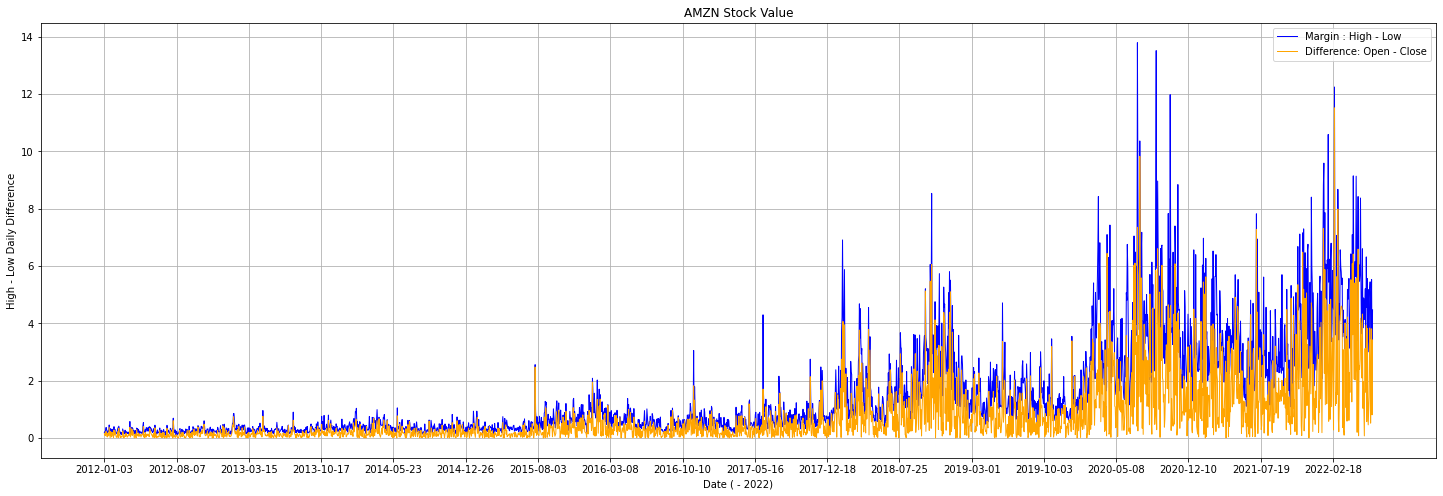

In [65]:
plt.figure(figsize = (25, 8))

ds_ = ds[ds['Ticker'] == 'AMZN']
ds_ = ds_[['Date', 'High', 'Low', 'Difference', 'Margin']]
x, y1, y2, y3, y4 = ds_['Date'], ds_['High'], ds_['Low'], ds_['Margin'], ds_['Difference']


# ------------------------------ VISUALIZATIONS --------------------------

plt.plot(x, y1, linewidth = 1., color = 'blue',  label = 'Daily High')
plt.plot(x, y2, linewidth = 1, color = 'orange', label = 'Daily Low') 
plt.xticks(np.arange(0, len(x)+1, 150))
plt.xlabel('Date ( - 2022)')
plt.ylabel('Stock Value')
plt.title('AMZN Stock Value')
plt.legend(loc = 0, frameon = 'legend_drawn_flag')
plt.grid()


plt.figure(figsize = (25, 8))
plt.plot(x, y3, linewidth = 1, color = 'blue',  label = 'Margin : High - Low')
plt.plot(x, y4, linewidth = 1, color = 'orange', label = 'Difference: Open - Close') 
plt.xticks(np.arange(0, len(x)+1, 150))
plt.xlabel('Date ( - 2022)')
plt.ylabel('High - Low Daily Difference')
plt.title('AMZN Stock Value')
plt.legend(loc = 0, frameon = 'legend_drawn_flag')
plt.grid()

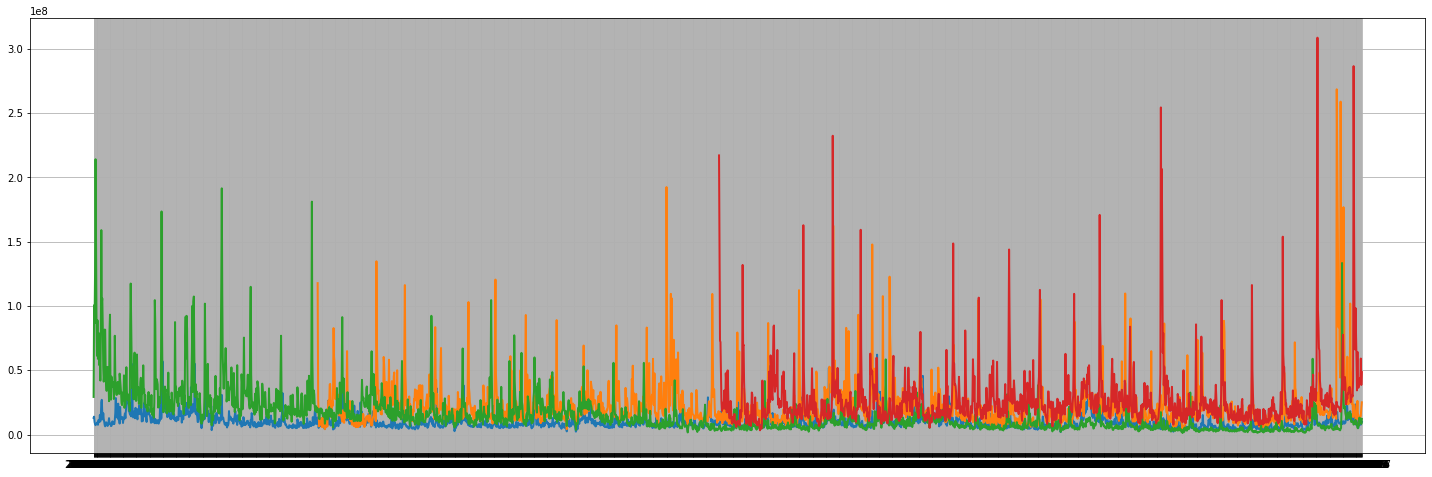

In [64]:
plt.figure(figsize = (25, 8))

wanted = ['SBUX', 'TWTR', 'NFLX', 'SNAP']
ds_ = ds[ds['Ticker'].isin(wanted)]
ds_ = ds_[['Ticker', 'Date', 'Volume', 'Close', 'Value@Close']]
for stock in wanted:
    ds_stock = ds_[ds_['Ticker'] == stock]
    x = ds_stock['Date']
    y = ds_stock['Volume']
    plt.plot(x, y, linewidth = 2)
plt.grid()
